##### 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing


In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
rcParams['axes.unicode_minus'] = False

In [5]:
#부산시 5대 범죄 발생 검거 현황 
busan_crime_2022 = pd.read_csv('./data/22년경찰청_부산광역시경찰청_경찰서별5대범죄발생현황.csv',encoding = 'utf-8')
busan_crime_2021 = pd.read_csv('./data/21년경찰청_부산광역시경찰청_경찰서별5대범죄발생현황.csv',encoding = 'utf-8')
busan_crime_2020 = pd.read_csv('./data/20년경찰청_부산광역시경찰청_경찰서별5대범죄발생현황.csv',encoding = 'utf-8')

In [6]:
busan_crime_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      15 non-null     int64 
 1   경찰서     15 non-null     object
 2   구분      15 non-null     object
 3   살인      15 non-null     int64 
 4   강도      15 non-null     int64 
 5    성범죄    15 non-null     int64 
 6   절도      15 non-null     int64 
 7   폭력      15 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


In [7]:
busan_crime_2022['합계'] = busan_crime_2022['살인']+busan_crime_2022['강도']+busan_crime_2022[' 성범죄']+busan_crime_2022['절도']+busan_crime_2022['폭력']

del busan_crime_2022['연번']
del busan_crime_2022['구분']

busan_crime_2022.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,0,4,38,540,578,1160
1,동래,1,1,99,725,964,1790
2,영도,3,1,19,295,510,828
3,동부,1,3,41,469,595,1109
4,부산진,6,3,222,1989,2318,4538


In [8]:
busan_crime_2021['합계'] = busan_crime_2021['살인']+busan_crime_2021['강도']+busan_crime_2021[' 성범죄']+busan_crime_2021['절도']+busan_crime_2021['폭력']

del busan_crime_2021['연번']
del busan_crime_2021['구분']

busan_crime_2021.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,3,2,30,583,565,1183
1,동래,2,1,99,922,1124,2148
2,영도,4,1,51,299,512,867
3,동부,2,0,36,478,656,1172
4,부산진,2,5,256,2177,2614,5054


In [9]:
busan_crime_2020['합계'] = busan_crime_2020['살인']+busan_crime_2020['강도']+busan_crime_2020[' 성범죄']+busan_crime_2020['절도']+busan_crime_2020['폭력']

del busan_crime_2020['연번']
del busan_crime_2020['구분']

busan_crime_2020.head()

,경찰서,살인,강도,성범죄,절도,폭력,합계
0,중부,1,0,42,686,644,1373
1,동래,5,2,101,1018,1325,2451
2,영도,0,0,25,366,615,1006
3,동부,2,0,43,571,809,1425
4,부산진,3,9,295,2317,3166,5790


In [10]:
busan_crime_2020.columns

Index(['경찰서', '살인', '강도', ' 성범죄', '절도', '폭력', '합계'], dtype='object')

In [11]:
busan_crime_2022 = busan_crime_2022.set_index('경찰서')
busan_crime_2022

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,0,4,38,540,578,1160
동래,1,1,99,725,964,1790
영도,3,1,19,295,510,828
동부,1,3,41,469,595,1109
부산진,6,3,222,1989,2318,4538
서부,2,1,25,454,440,922
남부,3,3,105,887,1405,2403
해운대,3,6,153,1333,1531,3026
사상,6,1,81,841,1003,1932


In [12]:
busan_crime_2021 = busan_crime_2021.set_index('경찰서')
busan_crime_2021

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,3,2,30,583,565,1183
동래,2,1,99,922,1124,2148
영도,4,1,51,299,512,867
동부,2,0,36,478,656,1172
부산진,2,5,256,2177,2614,5054
서부,1,2,30,414,625,1072
남부,4,6,161,1194,1638,3003
해운대,4,10,162,1238,1585,2999
사상,4,7,88,948,1070,2117


In [13]:
busan_crime_2020 = busan_crime_2020.set_index('경찰서')
busan_crime_2020

,살인,강도,성범죄,절도,폭력,합계
경찰서,,,,,,
중부,1,0,42,686,644,1373
동래,5,2,101,1018,1325,2451
영도,0,0,25,366,615,1006
동부,2,0,43,571,809,1425
부산진,3,9,295,2317,3166,5790
서부,1,1,22,458,581,1063
남부,7,4,152,1345,1952,3460
해운대,3,0,174,1336,1722,3235
사상,7,6,109,969,1420,2511


In [14]:
busan_crime_2020['합계']

경찰서
중부     1373
동래     2451
영도     1006
동부     1425
부산진    5790
서부     1063
남부     3460
해운대    3235
사상     2511
금정     2007
사하     2585
연제     2893
강서     1000
북부     2554
기장     1378
Name: 합계, dtype: int64

In [15]:
crime_sum = busan_crime_2022['합계'] + busan_crime_2021['합계'] + busan_crime_2020['합계']

In [16]:
crime_sum = pd.DataFrame(crime_sum)
crime_sum

,합계
경찰서,
중부,3716
동래,6389
영도,2701
동부,3706
부산진,15382
서부,3057
남부,8866
해운대,9260
사상,6560


<Axes: xlabel='경찰서'>

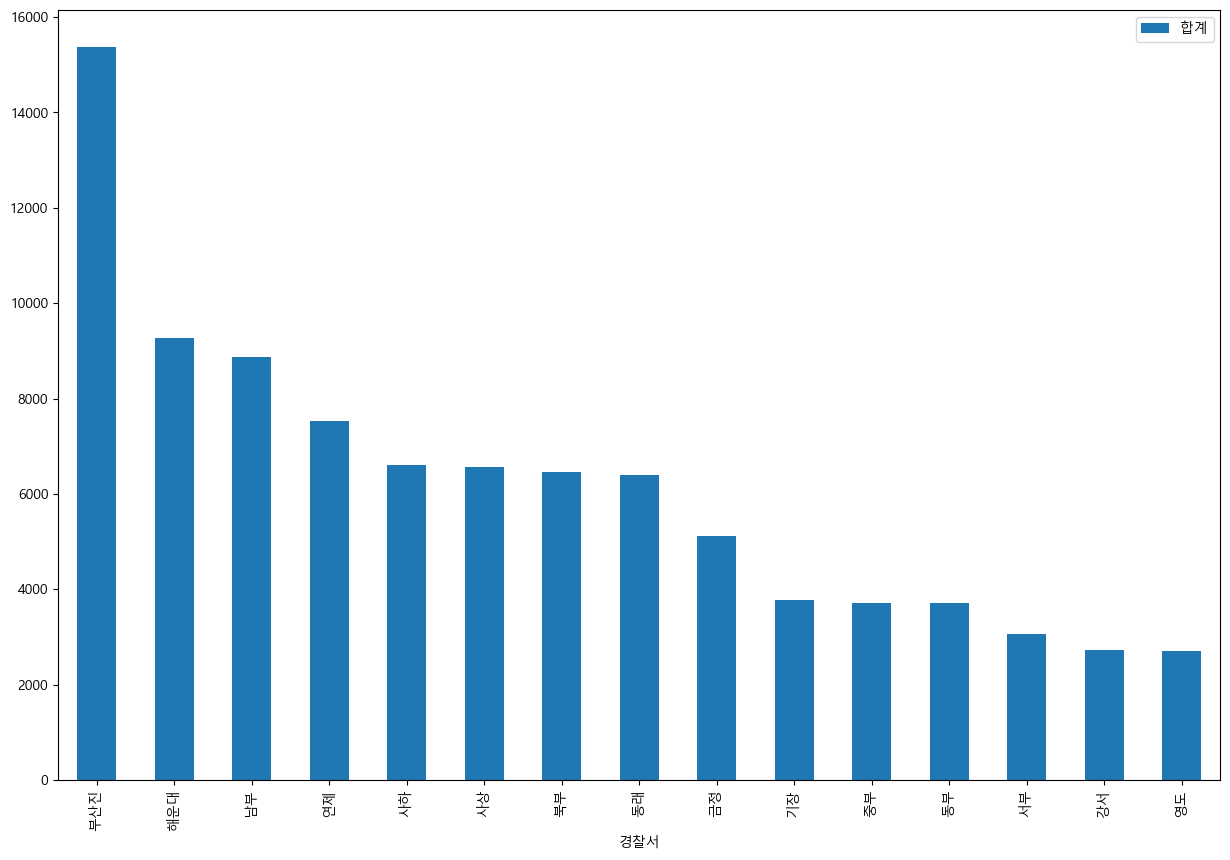

In [17]:
# 부산 5대 범죄 막대그래프로 비교

crime_sort = crime_sum.sort_values('합계', ascending=False)
crime_sort.plot.bar(figsize=(15,10))

In [18]:
crime_murder = busan_crime_2022['살인'] + busan_crime_2021['살인'] + busan_crime_2020['살인']

In [19]:
crime_murder

경찰서
중부      4
동래      8
영도      7
동부      5
부산진    11
서부      4
남부     14
해운대    10
사상     17
금정     10
사하     16
연제     12
강서      6
북부     11
기장      4
Name: 살인, dtype: int64

In [20]:
crime_murder = pd.DataFrame(crime_murder)
crime_murder

,살인
경찰서,
중부,4
동래,8
영도,7
동부,5
부산진,11
서부,4
남부,14
해운대,10
사상,17


In [21]:
crime_robber = busan_crime_2022['강도'] + busan_crime_2021['강도'] + busan_crime_2020['강도']
crime_robber = pd.DataFrame(crime_robber)
crime_robber

,강도
경찰서,
중부,6
동래,4
영도,2
동부,3
부산진,17
서부,4
남부,13
해운대,16
사상,14


In [22]:
crime_sex = busan_crime_2022[' 성범죄'] + busan_crime_2021[' 성범죄'] + busan_crime_2020[' 성범죄']
crime_sex = pd.DataFrame(crime_sex)
crime_sex

,성범죄
경찰서,
중부,110
동래,299
영도,95
동부,120
부산진,773
서부,77
남부,418
해운대,489
사상,278


In [23]:
crime_violence = busan_crime_2022['폭력'] + busan_crime_2021['폭력'] + busan_crime_2020['폭력']
crime_violence = pd.DataFrame(crime_violence)
crime_violence

,폭력
경찰서,
중부,1787
동래,3413
영도,1637
동부,2060
부산진,8098
서부,1646
남부,4995
해운대,4838
사상,3493


In [24]:
crime_theft = busan_crime_2022['절도'] + busan_crime_2021['절도'] + busan_crime_2020['절도']
crime_theft = pd.DataFrame(crime_theft)
crime_theft

,절도
경찰서,
중부,1809
동래,2665
영도,960
동부,1518
부산진,6483
서부,1326
남부,3426
해운대,3907
사상,2758


In [25]:
merge_1 = pd.merge(crime_murder,crime_robber, on='경찰서')
merge_2 = pd.merge(crime_sex,crime_violence, on='경찰서')

In [26]:
merge_3 = pd.merge(merge_1, merge_2, on='경찰서')
merge_4 = pd.merge(crime_theft, crime_sum, on = '경찰서')
result = pd.merge(merge_3, merge_4, on='경찰서')
result

,살인,강도,성범죄,폭력,절도,합계
경찰서,,,,,,
중부,4,6,110,1787,1809,3716
동래,8,4,299,3413,2665,6389
영도,7,2,95,1637,960,2701
동부,5,3,120,2060,1518,3706
부산진,11,17,773,8098,6483,15382
서부,4,4,77,1646,1326,3057
남부,14,13,418,4995,3426,8866
해운대,10,16,489,4838,3907,9260
사상,17,14,278,3493,2758,6560


In [27]:
districts = ['중부','동래','영도','동부','부산진','서부','남부','해운대','사상','금정','사하','연제','강서','북부','기장']
result['관할구'] = districts #경찰서 별 관할구 추가
by_district = result.groupby('관할구') #경찰서 별에서 관할구 별 범죄발생 테이블로 변경
district_crime = by_district.sum()
district_crime.head()

,살인,강도,성범죄,폭력,절도,합계
관할구,,,,,,
강서,6,7,107,1495,1117,2732
금정,10,9,226,2479,2396,5120
기장,4,2,143,2085,1544,3778
남부,14,13,418,4995,3426,8866
동래,8,4,299,3413,2665,6389


In [28]:
# 범죄별 빈도가 다르기 때문에 0~1의 범위로 놓고 비교 각 항목의 최댓값은 1 최소값은 0
col = ['살인','강도',' 성범죄','폭력','절도']
x = district_crime[col].values
scaler = preprocessing.MinMaxScaler()
x_scaled =  scaler.fit_transform(x.astype(float))
crime_norm = pd.DataFrame(x_scaled, columns = col, index = district_crime.index)
crime_norm

,살인,강도,성범죄,폭력,절도
관할구,,,,,
강서,0.153846,0.333333,0.043103,0.000000,0.028427
금정,0.461538,0.466667,0.214080,0.149023,0.260004
기장,0.000000,0.000000,0.094828,0.089353,0.105740
남부,0.769231,0.733333,0.489943,0.530062,0.446496
동래,0.307692,0.133333,0.318966,0.290474,0.308709
동부,0.076923,0.066667,0.061782,0.085567,0.101032
부산진,0.538462,1.000000,1.000000,1.000000,1.000000
북부,0.538462,0.666667,0.182471,0.279267,0.350353
사상,1.000000,0.800000,0.288793,0.302590,0.325548


<Axes: xlabel='관할구'>

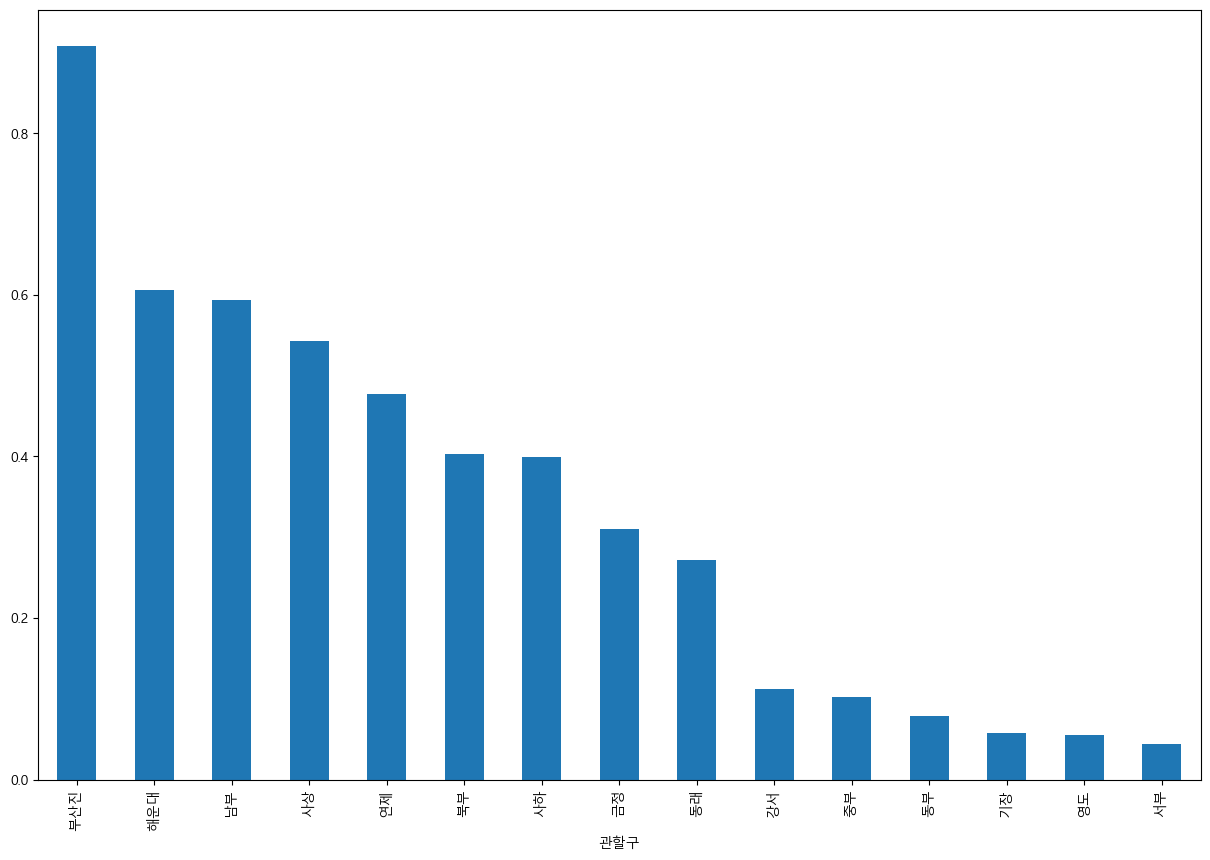

In [29]:
#5대범죄 막대그래프로 비교
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) / 5
crime_sort = crime_norm.sort_values('5대범죄', ascending=False)
crime_sort = crime_sort.iloc[:,5]
crime_sort.plot.bar(figsize=(15,10))

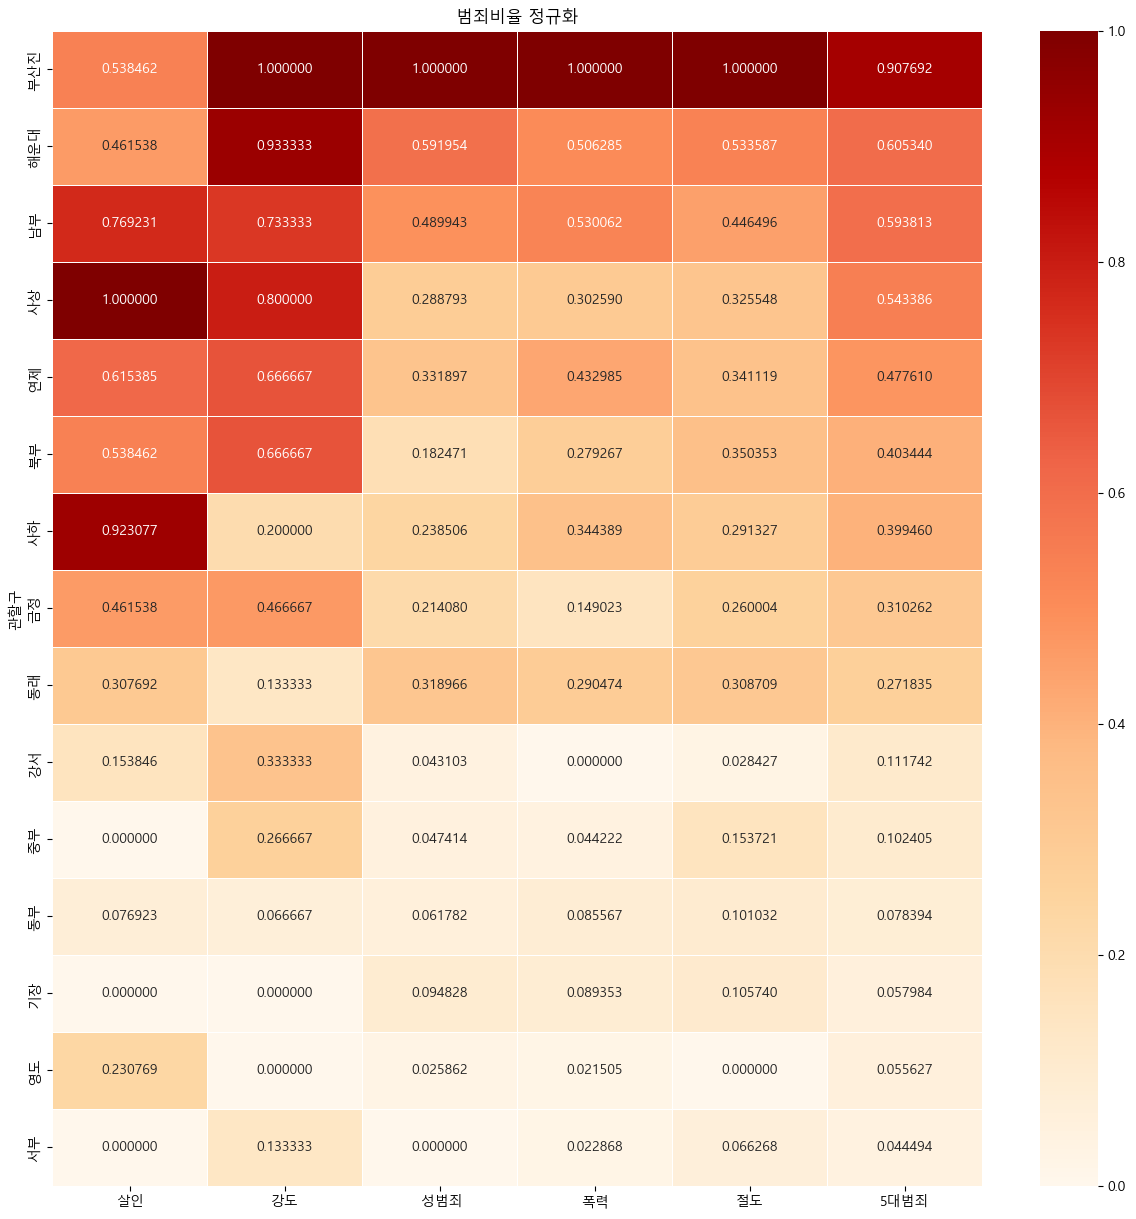

In [30]:
crime_norm['5대범죄'] = np.sum(crime_norm[col],axis=1) / 5
col.append('5대범죄')
crime_norm_sort = crime_norm.sort_values(by='5대범죄', ascending=False)
plt.figure(figsize=(15,15))

sns.heatmap(crime_norm_sort[col], annot=True, fmt='f', linewidth=.5 , cmap='OrRd')
plt.title('범죄비율 정규화')
plt.show()

In [31]:
crime_2022 = pd.DataFrame(np.sum(busan_crime_2022, axis=0))
crime_2021 = pd.DataFrame(np.sum(busan_crime_2021, axis=0))
crime_2020 = pd.DataFrame(np.sum(busan_crime_2020, axis=0))

In [32]:
crime_category = pd.concat([crime_2020, crime_2021, crime_2022], axis=1)
crime_category.columns=['2020', '2021', '2022']
crime_category

,2020,2021,2022
살인,51,46,42
강도,39,51,36
성범죄,1416,1338,1136
절도,14169,12670,11378
폭력,19056,16094,14338
합계,34731,30199,26930


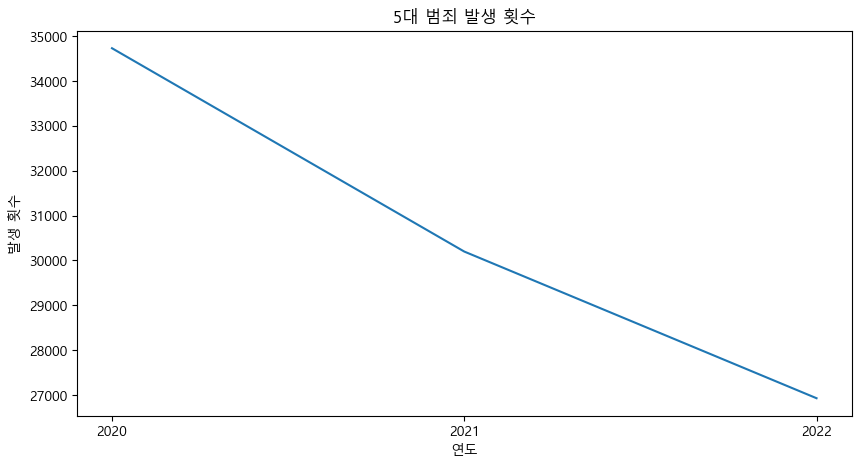

In [33]:
plt.figure(figsize=(10,5))
plt.plot(crime_category.iloc[5,:])
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('5대 범죄 발생 횟수')
plt.show()

Text(0.5, 1.0, '폭력 발생 횟수')

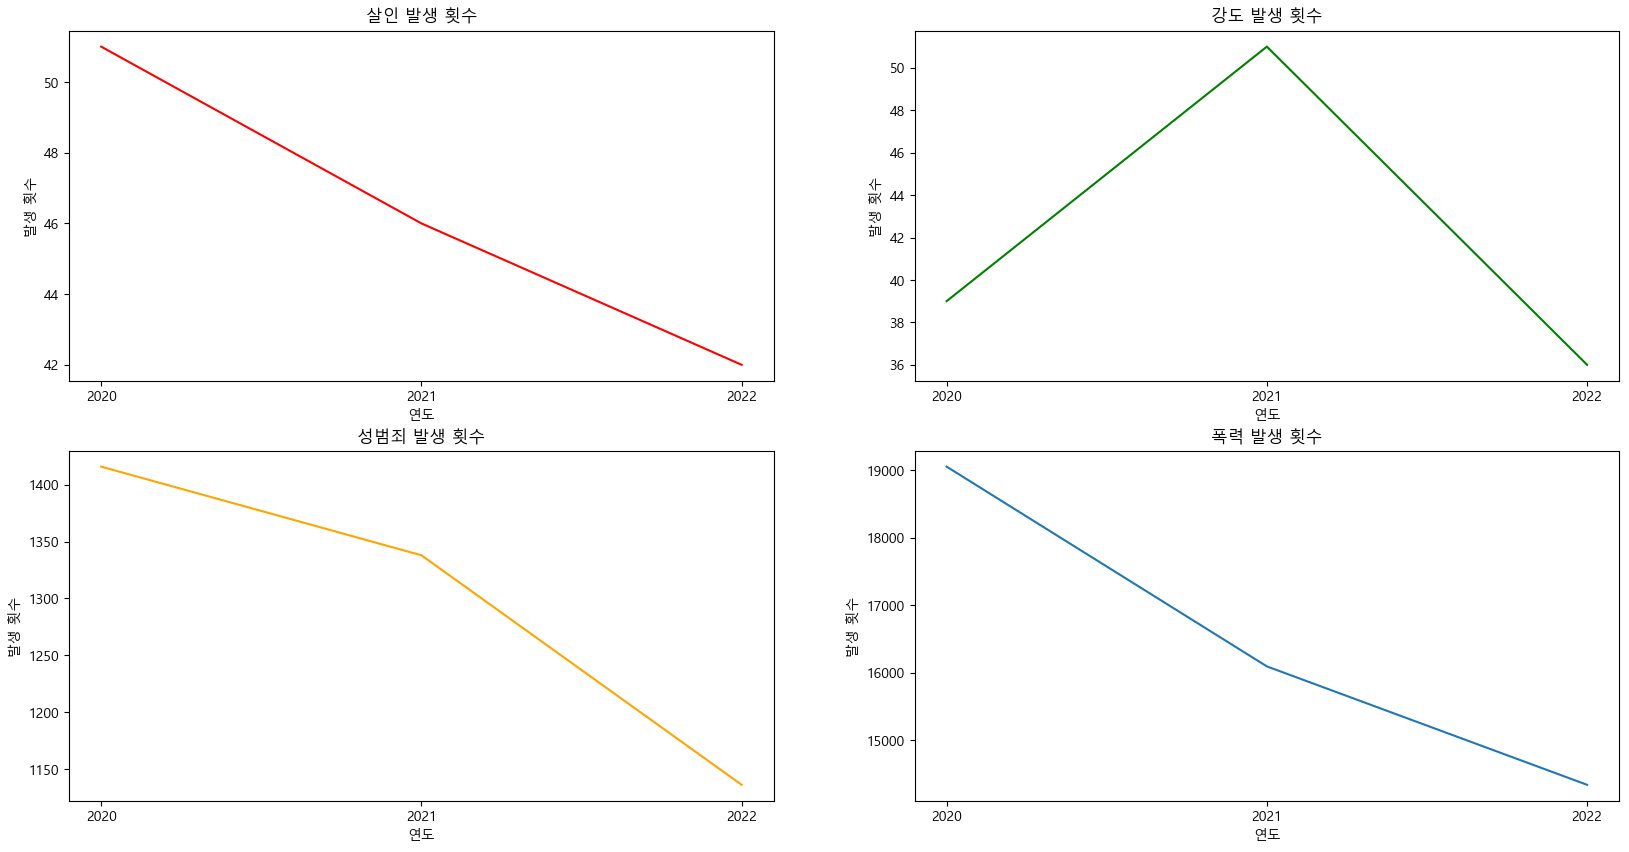

In [34]:
from turtle import color


plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(crime_category.iloc[0,:],color='red')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('살인 발생 횟수')

plt.subplot(2,2,2)
plt.plot(crime_category.iloc[1,:],color='green')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('강도 발생 횟수')

plt.subplot(2,2,3)
plt.plot(crime_category.iloc[2,:],color='orange')
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('성범죄 발생 횟수')

plt.subplot(2,2,4)
plt.plot(crime_category.iloc[4,:])
plt.xlabel('연도')
plt.ylabel('발생 횟수')
plt.title('폭력 발생 횟수')

##### 부산진구 주차장

In [71]:
parking_df_all =pd.read_csv('./data/부산광역시_공영주차장.csv',encoding = 'utf-8')
dfParking = parking_df_all[parking_df_all['관리기관명'] =='부산광역시 부산진구청'].reset_index(drop=True)
dfParking.head()

,운영형태,관리기관명,주차장명,주차장관리번호,소재지지번주소,소재지도로명주소,전화번호,주차장유형,주차구획수,평일운영시작시각,...,부제시행구분,운영요일,요금정보,주차기본시간,추가단위시간,추가단위요금,1일주차권요금적용시간,결제방법,특기사항,실시간주차면수
0,민간위탁,부산광역시 부산진구청,네오스포밑,2008011647,-,부산진구 부전2동 560-5,010-2269-3006,노상,38,08:00,...,-,-,-,10,10,300,-,-,-,-
1,민간위탁,부산광역시 부산진구청,부전복개도로,2008011648,-,부산진구 부전2동 575,010-3708-2505,노상,20,09:00,...,-,-,-,10,10,700,-,-,-,-
2,민간위탁,부산광역시 부산진구청,적십자회관,2008011649,-,부산진구 전포2동 865,010-2269-3006,노상,51,08:00,...,-,-,-,10,10,300,-,-,-,-
3,민간위탁,부산광역시 부산진구청,평화시장,2009000008,-,부산진구 범천1동 839-4,-,노상,23,-,...,-,-,-,10,10,300,-,-,-,-
4,구(군)직영,부산광역시 부산진구청,백양순환로 시간제 노상주차장,2010000007,-,부산진구 당감4동 649-34 백양순환로,-,노상,59,-,...,-,-,-,10,10,0,-,-,-,-


In [73]:
for i in range(57):
    if dfParking['소재지도로명주소'][i] == '-':
        dfParking['소재지도로명주소'][i] = dfParking['소재지지번주소'][i]
dfParking.tail()


,운영형태,관리기관명,주차장명,주차장관리번호,소재지지번주소,소재지도로명주소,전화번호,주차장유형,주차구획수,평일운영시작시각,...,부제시행구분,운영요일,요금정보,주차기본시간,추가단위시간,추가단위요금,1일주차권요금적용시간,결제방법,특기사항,실시간주차면수
52,민간위탁,부산광역시 부산진구청,광명3로 주거지전용주차장,2009000021,-,부산진구 양정2동 88-16,-,노외,15,-,...,-,-,-,10,10,0,-,-,-,-
53,민간위탁,부산광역시 부산진구청,적십자로 주거지전용주차장,2009000023,-,부산진구 전포2동 588-11,-,노외,14,-,...,-,-,-,10,10,-,-,-,-,-
54,민간위탁,부산광역시 부산진구청,삼성맨션옆 주거지전용주차장,2010000001,-,부산진구 당감4동 699-68,-,노외,21,-,...,-,-,-,10,10,0,-,-,-,-
55,민간위탁,부산광역시 부산진구청,복지1로 주거지전용주차장,2010000004,-,부산진구 개금1동 540-151,-,노외,16,-,...,-,-,-,10,10,0,-,-,-,-
56,구(군)직영,부산광역시 부산진구청,월드컵로 시간제노상주차장,2010000006,-,부산진구 초읍동 376-9 월드컵로,-,노상,44,-,...,-,-,-,10,10,0,-,-,-,-


In [74]:
dfParking=dfParking[['주차장명','소재지도로명주소']]
dfParking

,주차장명,소재지도로명주소
0,네오스포밑,부산진구 부전2동 560-5
1,부전복개도로,부산진구 부전2동 575
2,적십자회관,부산진구 전포2동 865
3,평화시장,부산진구 범천1동 839-4
4,백양순환로 시간제 노상주차장,부산진구 당감4동 649-34 백양순환로
5,테마공원로 시간제 노상주차장,부산진구 개금3동 60-1 테마공원로
6,가남공영(주거지전용)주차장,부산진구 가야1동 8-6
7,범천4동 소규모공동주차장,부산진구 범천2동 1127-9
8,금호천지맨션 뒤,부산진구 부암3동 411-3
9,큰별유치원 뒤,부산진구 개금3동 419-7


In [75]:
dfParking.rename(columns={'주차장명':'구분','소재지도로명주소':"도로명주소"},inplace=True)

In [76]:
dfParking['구분']='주차장'
dfParking

,구분,도로명주소
0,주차장,부산진구 부전2동 560-5
1,주차장,부산진구 부전2동 575
2,주차장,부산진구 전포2동 865
3,주차장,부산진구 범천1동 839-4
4,주차장,부산진구 당감4동 649-34 백양순환로
5,주차장,부산진구 개금3동 60-1 테마공원로
6,주차장,부산진구 가야1동 8-6
7,주차장,부산진구 범천2동 1127-9
8,주차장,부산진구 부암3동 411-3
9,주차장,부산진구 개금3동 419-7


In [77]:
dfParking.drop(index=[28,29,31,32,33,34,35,36,37,38],inplace=True)


In [78]:
dfParking = dfParking.reset_index(drop=True)
dfParking

,구분,도로명주소
0,주차장,부산진구 부전2동 560-5
1,주차장,부산진구 부전2동 575
2,주차장,부산진구 전포2동 865
3,주차장,부산진구 범천1동 839-4
4,주차장,부산진구 당감4동 649-34 백양순환로
5,주차장,부산진구 개금3동 60-1 테마공원로
6,주차장,부산진구 가야1동 8-6
7,주차장,부산진구 범천2동 1127-9
8,주차장,부산진구 부암3동 411-3
9,주차장,부산진구 개금3동 419-7


In [79]:
dfParking = dfParking.reset_index(drop=True)
dfParking

,구분,도로명주소
0,주차장,부산진구 부전2동 560-5
1,주차장,부산진구 부전2동 575
2,주차장,부산진구 전포2동 865
3,주차장,부산진구 범천1동 839-4
4,주차장,부산진구 당감4동 649-34 백양순환로
5,주차장,부산진구 개금3동 60-1 테마공원로
6,주차장,부산진구 가야1동 8-6
7,주차장,부산진구 범천2동 1127-9
8,주차장,부산진구 부암3동 411-3
9,주차장,부산진구 개금3동 419-7


In [50]:
# 구글맵스 설치
!pip install googlemaps

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40745 sha256=ac553b5fdb20f4dac3e9184346d28b09325a8085c4d1260f9dfe37e726b0bcb9
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\4c\6a\a7\bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps


In [54]:
!pip install pillow
!pip install image

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
    --------------------------------------- 0.2/8.2 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.2 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.2 MB 7.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.2 MB 8.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.2 MB 9.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.3/8.2 MB 12.2 MB/s eta 0:00:01
   --------------------- -------------

In [138]:
# 구글 맵스 인증키 생성
import googlemaps

gmaps_key = ''
gmaps = googlemaps.Client(key=gmaps_key)

In [139]:
#지도 시각화 도구
import folium
map=folium.Map(location=[35.15472391,129.0596437],zoom_start=13)
map

In [82]:
for apt in dfParking['도로명주소']:

  parking_ad = apt.replace(" ","")
  tmpMap = gmaps.geocode(parking_ad, language='ko')
  print(tmpMap)

[{'address_components': [{'long_name': '560-5', 'short_name': '560-5', 'types': ['premise']}, {'long_name': '부전동', 'short_name': '부전동', 'types': ['political', 'sublocality', 'sublocality_level_2']}, {'long_name': '부산진구', 'short_name': '부산진구', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': '부산광역시', 'short_name': '부산광역시', 'types': ['administrative_area_level_1', 'political']}, {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']}, {'long_name': '47283', 'short_name': '47283', 'types': ['postal_code']}], 'formatted_address': '대한민국 부산광역시 부산진구 부전동 560-5', 'geometry': {'location': {'lat': 35.1530488, 'lng': 129.054165}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 35.1543977802915, 'lng': 129.0555139802915}, 'southwest': {'lat': 35.1516998197085, 'lng': 129.0528160197085}}}, 'place_id': 'ChIJEfVAsnbraDURsVVOKkLzoyg', 'plus_code': {'compound_code': '5333+6M 대한민국 부산광역시', 'global_code': '8Q7F5333+6M'}, 'types': ['street_addre

In [83]:
lat = []
lng = []

for apt in dfParking['도로명주소']:

  parking_ad = apt.replace(" ","")
  tmpMap = gmaps.geocode(parking_ad, language='ko')
  tmpLoc = tmpMap[0].get('geometry')
  lat.append(tmpLoc['location']['lat'])
  lng.append(tmpLoc['location']['lng'])

dfParking['lat']=lat
dfParking['lng']=lng

dfParking

,구분,도로명주소,lat,lng
0,주차장,부산진구 부전2동 560-5,35.153049,129.054165
1,주차장,부산진구 부전2동 575,35.153443,129.058853
2,주차장,부산진구 전포2동 865,35.161677,129.067575
3,주차장,부산진구 범천1동 839-4,35.141366,129.061351
4,주차장,부산진구 당감4동 649-34 백양순환로,35.167387,129.037714
5,주차장,부산진구 개금3동 60-1 테마공원로,35.159043,129.022952
6,주차장,부산진구 가야1동 8-6,35.150812,129.038071
7,주차장,부산진구 범천2동 1127-9,35.151790,129.048369
8,주차장,부산진구 부암3동 411-3,35.169040,129.041141
9,주차장,부산진구 개금3동 419-7,35.159043,129.022952


In [84]:
for n in dfParking.index:
    folium.CircleMarker([dfParking['lat'][n], dfParking['lng'][n]], color='orange', fill_color='orange').add_to(map)
map

##### 범죄 - 장소별 시각화

In [127]:
crime_area=pd.read_csv('./data/경찰청_범죄발생_장소별통계_20221231.csv',encoding = 'utf-8')
crime_area.head()

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111


In [128]:
# 강력, 절도, 폭력범죄(16행까지)만 추출
crime_area_data = crime_area[:17] 

# '기타'열 제거
cri_area_data = crime_area_data.drop(['기타'],axis=1)

# 장소별 발생건수 Sum값 리스트화 시키기
list_sum = []
for i in cri_area_data:
    list_sum.append(cri_area_data[i].sum())
    list_sum = list_sum[1:]
    list_sum.insert(0,0)

# 마지막 행에 Sum값 추가
cri_area_data.loc['Sum'] = list_sum

In [129]:
cri_area_data

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,7,1,3,3,0,0,0,5,0,0
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,6,1,3,0,0,0,0,5,2,1
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,0,3,0,0,1,0,21,1,4
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,11,7,9,0,1,0,1,45,48,3
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,11,2,5,0,0,2,0,7,12,1
5,강력범죄,강제추행,1619,983,11,3098,34,86,277,11,...,301,45,32,2,20,8,0,114,65,37
6,강력범죄,기타 강간?강제추행등,71,54,0,16,0,0,0,0,...,2,0,0,0,0,0,0,1,6,0
7,강력범죄,방화,331,274,1,207,0,5,6,1,...,15,2,15,4,0,0,2,32,8,3
8,절도범죄,절도범죄,17196,8117,115,51945,2274,11703,6994,3536,...,946,574,3362,46,15,4,52,10381,703,994
9,폭력범죄,상해,4160,2570,35,9150,13,88,126,12,...,323,61,130,22,14,5,6,592,51,53


Text(0.5, 1.0, '장소별 범죄 발생 횟수')

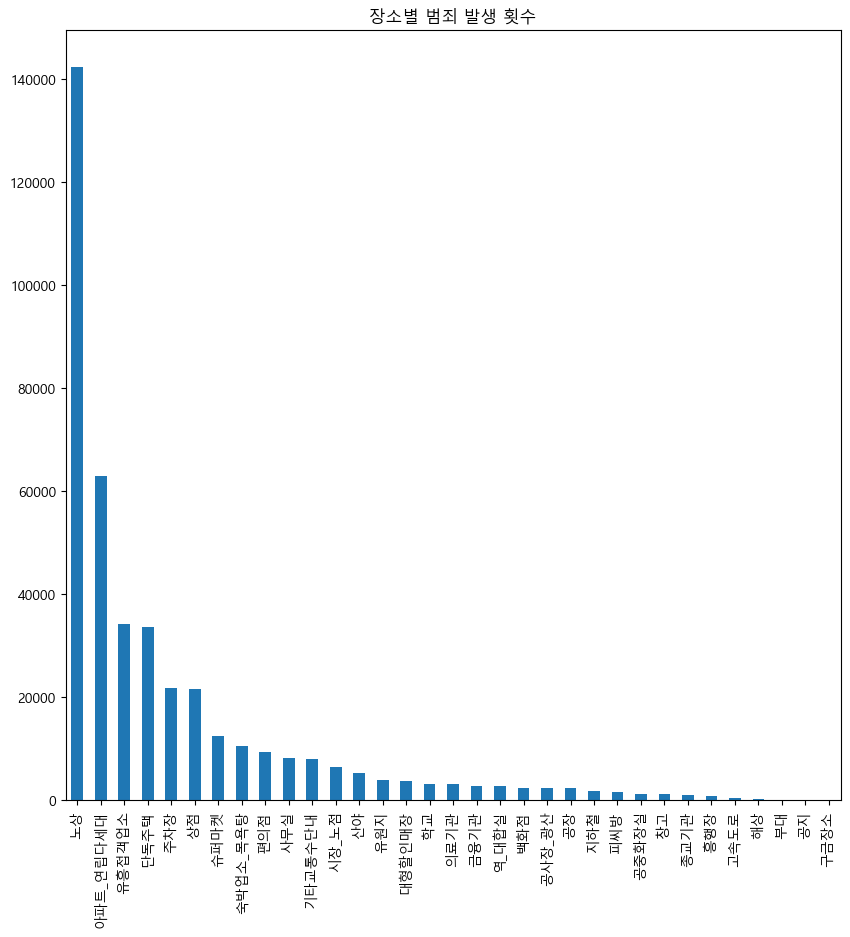

In [130]:
#장소별 범죄 현황 / 막대 그래프로 나타내기
cri_area_sum = cri_area_data.loc['Sum']
cri_area_sum = cri_area_sum.iloc[2:]
cri_area_sum = cri_area_sum.sort_values(ascending=False)
cri_area_sum.plot.bar(figsize=(10, 10))
plt.title('장소별 범죄 발생 횟수')

In [136]:
crime_area_data = crime_area_data.groupby(['범죄대분류']).sum()
crime_area_data

,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
범죄대분류,,,,,,,,,,,,,,,,,,,,,
강력범죄,살인기수살인미수등강도강간유사강간강제추행기타 강간?강제추행등방화,4176,2529,14,3810,35,106,319,14,480,...,58,70,9,21,11,3,230,142,49,2458
절도범죄,절도범죄,17196,8117,115,51945,2274,11703,6994,3536,17550,...,574,3362,46,15,4,52,10381,703,994,14665
폭력범죄,상해폭행체포?감금협박약취?유인폭력행위등공갈손괴,41558,23092,395,86637,181,768,2167,148,3530,...,444,1866,125,110,50,35,11213,454,497,22501
